In [77]:
# configration of path of kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [78]:
!kaggle datasets download -d muhammadehsan000/paris-2024-summer-olympic-games-dataset

Dataset URL: https://www.kaggle.com/datasets/muhammadehsan000/paris-2024-summer-olympic-games-dataset
License(s): CC-BY-NC-SA-4.0
paris-2024-summer-olympic-games-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [79]:
from zipfile import ZipFile
dataset='/content/paris-2024-summer-olympic-games-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Successfully File Extracted')

Successfully File Extracted


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [81]:
data = pd.read_csv('/content/events.csv')
data.head()

,event,tag,sport,sport_code,sport_url
0,Men's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
1,Women's Individual,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
2,Men's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
3,Women's Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery
4,Mixed Team,archery,Archery,ARC,https://olympics.com/en/paris-2024/sports/archery


In [82]:
data.shape

(329, 5)

In [83]:
Top_10_Events = dict(data.tag.value_counts()[:10])


In [108]:
for x,y in Top_10_Events.items():
  print(f'{x.capitalize()} ({y})',end=', ')

Athletics (48), Swimming (35), Wrestling (18), Judo (15), Shooting (15), Rowing (14), Artistic-gymnastics (14), Boxing (13), Fencing (12), Cycling-track (12), 

<ipython-input-85-c3cea4321999>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart = sns.barplot(x=Top_10_Events.keys(), y=Top_10_Events.values(), palette=sns.color_palette("rocket"))
<ipython-input-85-c3cea4321999>:2: UserWarning: 
The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.
  chart = sns.barplot(x=Top_10_Events.keys(), y=Top_10_Events.values(), palette=sns.color_palette("rocket"))
<ipython-input-85-c3cea4321999>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=25, horizontalalignment='right')


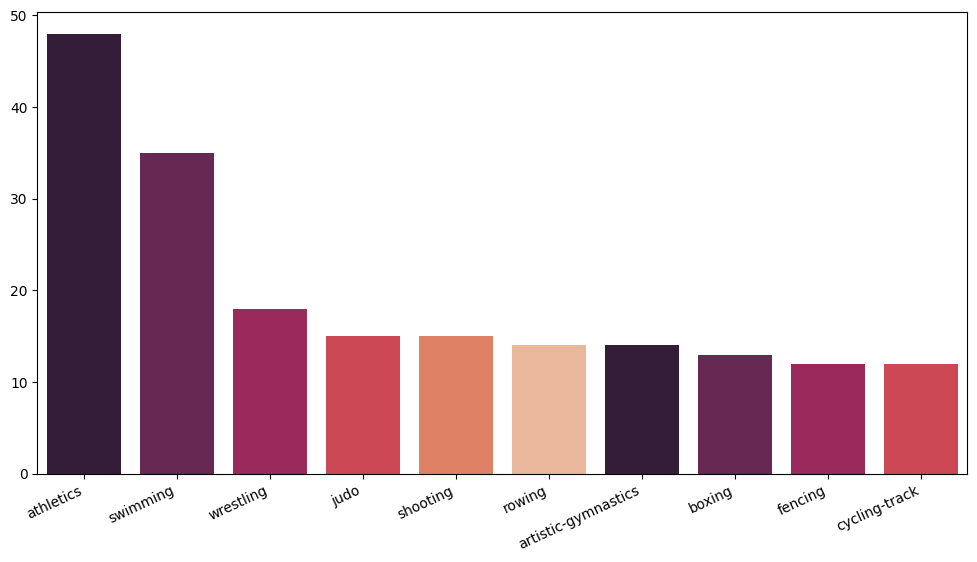

In [85]:
plot = plt.figure(figsize=(12, 6))
chart = sns.barplot(x=Top_10_Events.keys(), y=Top_10_Events.values(), palette=sns.color_palette("rocket"))
chart.set_xticklabels(chart.get_xticklabels(), rotation=25, horizontalalignment='right')
plot.show()

In [86]:
data[data.event.str.contains("Men's",na=False)].event.count()

127

In [87]:
data[data.event.str.contains("Women's",na=False)].event.count()

118

Text(0.5, 1.0, 'Types Of event based on gender')

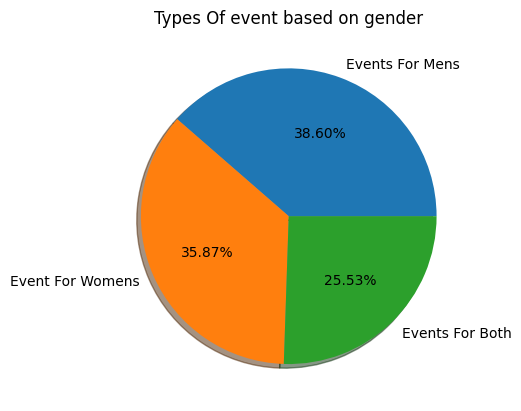

In [88]:
Events_for_Mens = 127
Events_for_Womens = 118
Total_events = 329

plt.pie([127,118,(329-(127+118))],labels=['Events For Mens','Event For Womens','Events For Both'],autopct='%1.2f%%',shadow=True)
plt.title('Types Of event based on gender')

In [143]:
data = pd.read_csv('/content/medallists.csv')
data.head()

,medal_date,medal_type,medal_code,name,gender,country,country_code,nationality,team,team_gender,discipline,event,event_type,url_event,birth_date,code
0,2024-07-27,Gold Medal,1,EVENEPOEL Remco,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,2000-01-25,1903136
1,2024-07-27,Silver Medal,2,GANNA Filippo,Male,Italy,ITA,Italy,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1996-07-25,1923520
2,2024-07-27,Bronze Medal,3,van AERT Wout,Male,Belgium,BEL,Belgium,NaN,NaN,Cycling Road,Men's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/men-s-indi...,1994-09-15,1903147
3,2024-07-27,Gold Medal,1,BROWN Grace,Female,Australia,AUS,Australia,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1992-07-07,1940173
4,2024-07-27,Silver Medal,2,HENDERSON Anna,Female,Great Britain,GBR,Great Britain,NaN,NaN,Cycling Road,Women's Individual Time Trial,ATH,/en/paris-2024/results/cycling-road/women-s-in...,1998-11-14,1912525


In [148]:
list(data[data.name == 'HENDERSON Anna'].country_code)

['GBR']

In [128]:
data.shape

(2271, 16)

In [112]:
data.drop_duplicates().shape

(2271, 16)

In [139]:
Top_Performing_Athletes = dict(data.name.value_counts()[:35])

In [149]:
for i,j in Top_Performing_Athletes.items():
  print(f'{i}       {j}  {list(data[data.name == i].country_code[:1])[0]}')

ZHANG Yufei       6  CHN
HUSKE Torri       5  USA
MARCHAND Leon       5  FRA
SMITH Regan       5  USA
McKEOWN Kaylee       5  AUS
O'CALLAGHAN Mollie       5  AUS
BILES Simone       4  USA
ANDRADE Rebeca       4  BRA
TITMUS Ariarne       4  AUS
LEDECKY Katie       4  USA
YANG Junxuan       4  CHN
WALSH Gretchen       4  USA
McINTOSH Summer       4  CAN
OKA Shinnosuke       4  JPN
DOUGLASS Kate       4  USA
TANG Qianting       3  CHN
SUN Yingsha       3  CHN
ZHANG Boheng       3  CHN
MURPHY Ryan       3  USA
XU Jiayu       3  CHN
McKEON Emma       3  AUS
LIM Sihyeon       3  KOR
HARRIS Meg       3  AUS
FINK Nic       3  USA
ZOU Jingyuan       3  CHN
HASSAN Sifan       3  NED
KIM Woojin       3  KOR
PAN Zhanle       3  CHN
LEE Sunisa       3  USA
DRESSEL Caeleb       3  USA
CHALMERS Kyle       3  AUS
LAVREYSEN Harrie       3  NED
ANDREWS Ellesse       3  NZL
FINUCANE Emma       3  GBR
RICHARDSON Matthew       3  AUS
PINTADO Brian Daniel       2  ECU


In [91]:
dt = data[~data.event.str.contains('Men',na=False)]

In [92]:
dt = dt[~data.event.str.contains('Women',na=False)]

<ipython-input-92-3370f9322c0f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dt = dt[~data.event.str.contains('Women',na=False)]


In [93]:
dt.shape

(245, 16)

In [94]:
dt.groupby(['gender','medal_type']).medal_type.count()

gender  medal_type  
Female  Bronze Medal    45
        Gold Medal      42
        Silver Medal    40
Male    Bronze Medal    42
        Gold Medal      35
        Silver Medal    36
Name: medal_type, dtype: int64

Text(0.5, 1.0, 'Medals on mixed events')

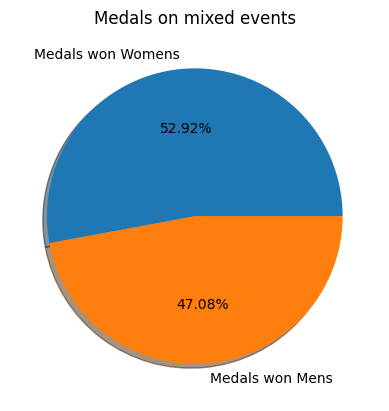

In [95]:
# In mixed games Female's won more medal than male's

plt.pie([127,113],labels=['Medals won Womens','Medals won Mens'],autopct='%1.2f%%',shadow=True)
plt.title('Medals on mixed events')

In [96]:
# Medals on all events

medals = dict(data.groupby(['gender','medal_type']).medal_type.count())
medal = list(medals.values())
medals

{('Female', 'Bronze Medal'): 386,
 ('Female', 'Gold Medal'): 363,
 ('Female', 'Silver Medal'): 367,
 ('Male', 'Bronze Medal'): 398,
 ('Male', 'Gold Medal'): 368,
 ('Male', 'Silver Medal'): 370}

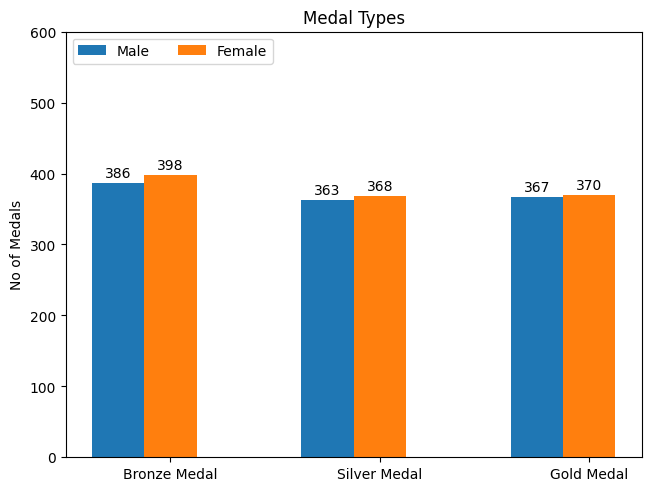

In [97]:
import numpy as np

Medals = ("Bronze Medal", "Silver Medal", "Gold Medal")
distribution = {
    'Male': medal[:3],
    'Female': medal[3:],
}

x = np.arange(len(Medals))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in distribution.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1


ax.set_ylabel('No of Medals')
ax.set_title('Medal Types')
ax.set_xticks(x + width, Medals)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,600)
plt.show()


In [124]:
data = pd.read_csv('/content/medals_total.csv')

In [125]:
data.head(15)

,country_code,Gold Medal,Silver Medal,Bronze Medal,Total
0,USA,40,44,42,126
1,CHN,39,27,24,90
2,JPN,20,12,13,45
3,AUS,18,19,16,53
4,FRA,16,26,22,64
5,NED,15,7,12,34
6,GBR,14,21,29,64
7,KOR,13,9,10,32
8,ITA,12,13,13,38
9,GER,11,13,8,32


In [100]:
Top_15_Countries = data[:15]

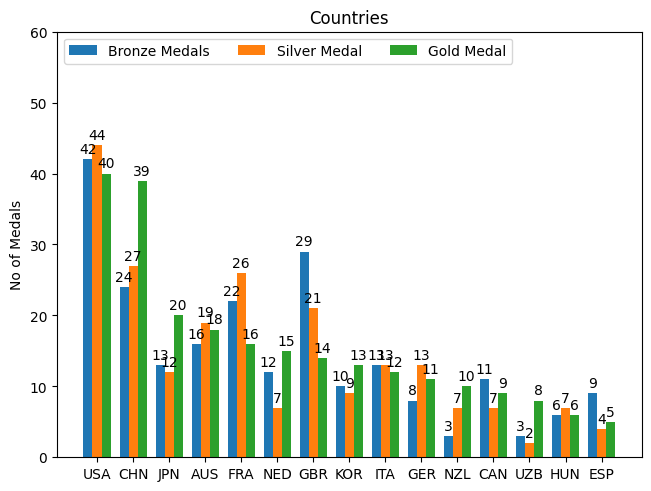

In [101]:
countries = Top_15_Countries.country_code
medals = {
    'Bronze Medals':Top_15_Countries['Bronze Medal'],
    'Silver Medal':Top_15_Countries['Silver Medal'],
    'Gold Medal':Top_15_Countries['Gold Medal']
}

x = np.arange(len(countries))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in medals.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=2)
    multiplier += 1


ax.set_ylabel('No of Medals')
ax.set_title('Countries')
ax.set_xticks(x + width,countries)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0,60)
plt.show()


# **Conclusion**

1. Paris Olympic 2024 top event were -
         Athletics (48)
         Swimming (35)
         Wrestling (18)
         Judo (15)
         Shooting (15)
         Rowing (14)
         Artistic-gymnastics (14)
         Boxing (13)
         Fencing (12)
         Cycling-track (12)

2. Top Performing Players -
               Players   No of Medal  Country

              ZHANG Yufei          6  CHN
              HUSKE Torri          5  USA
              MARCHAND Leon        5  FRA
              SMITH Regan          5  USA
              McKEOWN Kaylee       5  AUS
              O'CALLAGHAN Mollie   5  AUS
              BILES Simone         4  USA
              ANDRADE Rebeca       4  BRA
              TITMUS Ariarne       4  AUS
              LEDECKY Katie        4  USA
              YANG Junxuan         4  CHN
              WALSH Gretchen       4  USA
              McINTOSH Summer      4  CAN
              OKA Shinnosuke       4  JPN
              DOUGLASS Kate        4  USA
              TANG Qianting        3  CHN
              SUN Yingsha          3  CHN
              ZHANG Boheng         3  CHN
              MURPHY Ryan          3  USA
              XU Jiayu             3  CHN
              McKEON Emma          3  AUS
              LIM Sihyeon          3  KOR
              HARRIS Meg           3  AUS
              FINK Nic             3  USA
              ZOU Jingyuan         3  CHN
              HASSAN Sifan         3  NED
              KIM Woojin           3  KOR
              PAN Zhanle           3  CHN
              LEE Sunisa           3  USA
              DRESSEL Caeleb       3  USA
              CHALMERS Kyle        3  AUS
              LAVREYSEN Harrie     3  NED
              ANDREWS Ellesse      3  NZL
              FINUCANE Emma        3  GBR
              RICHARDSON Matthew   3  AUS
              PINTADO Brian Daniel 2  ECU

3. Overall Olympic, There were 127 events for men's, 118 events for women's and 84 events for both.

4. 127 Women's won Medals in mixed events and 113 medal men's won in mixed events.

5. Overall olympic women won-
            386 Bronze Medals
            363 Gold Medals
            367 Silver Medals
  And men won -
            398 Bronze Medals,
            368 Gold Medals,
            370 Silver Medals

6. Top 15 coutries wons the medals-
        Country     Gold Medal     Silver Medal      Bronze Medal        Total
         USA	          40	        44                42	          126
         CHN	          39	        27	            24	          90
 	    JPN	          20	        12	            13	          45
	     AUS	          18	        19	            16	          53
	     FRA	          16	        26	            22	          64
	     NED	          15	        7	             12	          34
	     GBR	          14	        21	            29	          64
	     KOR	          13	        9	             10	          32
         ITA	          12	        13	            13	          38
	     GER	          11	        13	            8	           32
	     NZL	          10	        7	             3	           20
	     CAN	          9	         7	             11	          27
	     UZB	          8	         2             	3	           13
	     HUN	          6	         7                 6	           19
	     ESP	          5	         4	             9	           18

      
